### Exercise 1: further practice with the movies dataset

In this unit, you will continue the work with the movies dataset that we saw in the previous units. We saw how to clean up the text of the genres column. Your task is to apply similar transformations to the keywords column. Your task is the following

**Task:** Transform the entries of the column keywords so that they each contain the first 3 keywords separated by a comma.


In [34]:
# Import libraries
import pandas as pd
import numpy as np

# Load the data
movies = pd.read_csv("c2_tmdb_5000_movies.csv")

In [36]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    s = s.str.replace("0", "", regex=True)
    s = s.str.replace("1", "", regex=True)
    s = s.str.replace("2", "", regex=True)
    s = s.str.replace("3", "", regex=True)
    s = s.str.replace("4", "", regex=True)
    s = s.str.replace("5", "", regex=True)
    s = s.str.replace("6", "", regex=True)
    s = s.str.replace("7", "", regex=True)
    s = s.str.replace("8", "", regex=True)
    s = s.str.replace("9", "", regex=True)
    s = s.str.replace("    ", ", ")
    s = s.str.replace("   ", "")
    return s

keywords = transform(movies.keywords)
#keywords_df=keywords.str.split(',').apply(lambda x:",".join(x[:3]))
keywords.head(5)
substrings=keywords.str.split(",",expand=True)
substrings.head(5)



,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,culture clash,future,space war,space colony,society,space travel,futuristic,romance,space,alien,...,None,None,None,None,None,None,None,None,None,None
1,ocean,drug abuse,exotic island,east india trading company,love of one's life,traitor,shipwreck,strong woman,ship,alliance,...,None,None,None,None,None,None,None,None,None,None
2,spy,based on novel,secret agent,sequel,mi,british secret service,united kingdom,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,dc comics,crime fighter,terrorist,secret identity,burglar,hostage drama,time bomb,gotham city,vigilante,cover-up,...,None,None,None,None,None,None,None,None,None,None
4,based on novel,mars,medallion,space travel,princess,alien,steampunk,martian,escape,edgar rice burroughs,...,None,None,None,None,None,None,None,None,None,None


In [40]:
movies.keywords=substrings[0]+", "+substrings[1]+", "+substrings[2]
movies.keywords.head(10)

0       culture clash,  future,  space war
1       ocean,  drug abuse,  exotic island
2      spy,  based on novel,  secret agent
3    dc comics,  crime fighter,  terrorist
4        based on novel,  mars,  medallion
5      dual identity,  amnesia,  sandstorm
6                  hostage,  magic,  horse
7        marvel comic,  sequel,  superhero
8                    witch,  magic,  broom
9        dc comics,  vigilante,  superhero
Name: keywords, dtype: object

### Exercise: using regular expressions in pandas

In this unit, you will get to practice the regular expression you just learned. You will work with a dataset that contains information about a person’s meals over the last week. The data is stored in a single text file given below

In [1]:
meal_plan = [
    "Monday: 9:12am – Omelet,  3:30pm– Apple slices with almond butter",
    "Tuesday: 9:35am – Banana bread, 11:00am –Sauteed veggies, 7:02pm– Taco pie",
    "Wednesday: 9:00am – Banana pancakes",
    "Thursday: 7:23pm– Slow cooker pulled pork",
    "Friday: 3:30pm – Can of tuna",
    "Saturday: 9:11am: Eggs and sweet potato hash browns, 3:22pm: Almonds",
    "Sunday: 11:00am: Meat and veggie stir fry",
]

Start by defining a DataFrame to hold this data

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame(meal_plan, columns=["text"])
df

,text
0,"Monday: 9:12am – Omelet, 3:30pm– Apple slices..."
1,"Tuesday: 9:35am – Banana bread, 11:00am –Saute..."
2,Wednesday: 9:00am – Banana pancakes
3,Thursday: 7:23pm– Slow cooker pulled pork
4,Friday: 3:30pm – Can of tuna
5,Saturday: 9:11am: Eggs and sweet potato hash b...
6,Sunday: 11:00am: Meat and veggie stir fry


Your task is to extract all of the times that appear in the strings and store them in a new DataFrame as the one below. Note: For the purpose of the exercise we are ignoring the time of the meal and we are always labeling the first meal of the day as breakfast, then lunch and dinner.

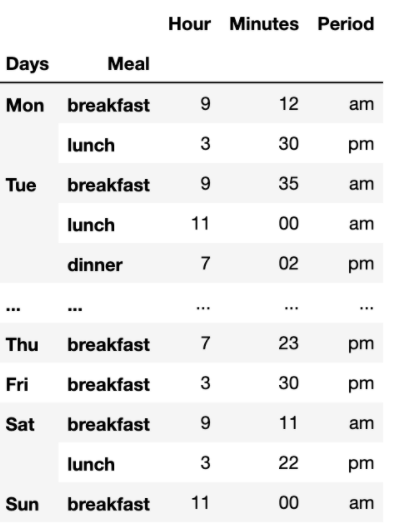

In [3]:
from IPython.display import Image
Image(filename="Exercise2.png")

#### Hints
* the method str.extract() extracts only the first occurrence of the match in each string. To extract all occurrences of a match we must use str.extractall().
* the levels and labels of a MultiIndex can be changed using index.set_levels() and index.set_labels() respectively

In [15]:
# Extract numbers from the hours and minutes
sol=df["text"].str.extractall("(\d?\d):(\d\d) ?([ap]m)")
sol

0   1   2
  match            
0 0       9  12  am
  1       3  30  pm
1 0       9  35  am
  1      11  00  am
  2       7  02  pm
2 0       9  00  am
3 0       7  23  pm
4 0       3  30  pm
5 0       9  11  am
  1       3  22  pm
6 0      11  00  am

In [16]:
days=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
meals=["breakfast", "lunch", "dinner"]

In [17]:
sol.index.set_levels([days,meals],inplace=True)
sol.index.set_names(["Day","Meal"],inplace=True)
sol.columns=["Hour", "Minutes", "Period"]
sol

C:\Users\56975\AppData\Local\Temp/ipykernel_22940/1046746641.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  sol.index.set_levels([days,meals],inplace=True)


Hour Minutes Period
Day Meal                         
Mon breakfast    9      12     am
    lunch        3      30     pm
Tue breakfast    9      35     am
    lunch       11      00     am
    dinner       7      02     pm
Wed breakfast    9      00     am
Thu breakfast    7      23     pm
Fri breakfast    3      30     pm
Sat breakfast    9      11     am
    lunch        3      22     pm
Sun breakfast   11      00     am